# Section 1 : Python basics & the LIF model
## Section 1.1 The LIF Model

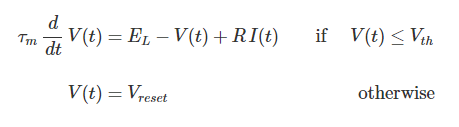

## Section 1.2 Comments in code
using #

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Figure settings
import ipywidgets as widgets #interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [6]:
t_max = 150e-3   #second
dt = 1e-3        #second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)


0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


## Section 1.3 : Math operations
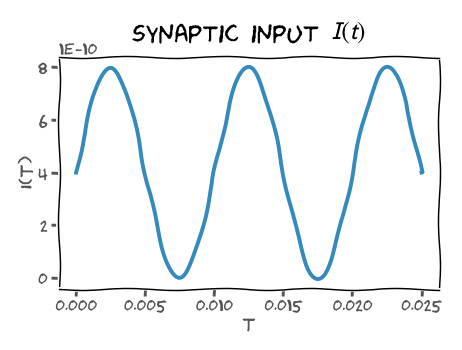

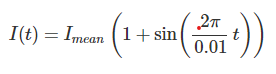

In [18]:
for step in range(10):
    # compute valued of t
    t = step*dt
    # compute value of i at this time step
    i = i_mean*(1+np.sin((2*np.pi*t)/0.01))
    # Print value of i
    print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688176e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


## Section 1.4 : Print formatting

In [19]:
x = 3.14159265e-1
print(f'{x:.3f}')
print(f'{x:.4e}')

0.314
3.1416e-01


In [20]:
# Initialize step_end
step_end = 10

# Loop for step_end steps
for step in range(step_end):
    
    # compute value of t
    t = step*dt
    
    # Compute value of i at this time step
    i = i_mean*(1+np.sin((2*np.pi*t)/0.01))
    
    print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


# Section 2: For loops & discrete time integration
## Section 2.1 : For Loops

In [21]:
for step in [0, 1, 2]:
    print(step)
for step in range(3):
    print(step)
start = 0
end =3
stepsize = 1
for step in range(start, end, stepsize):
    print(step)

0
1
2
0
1
2
0
1
2


## Section 2.2: Discrete time integration with spikes
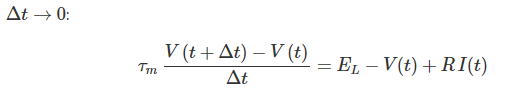
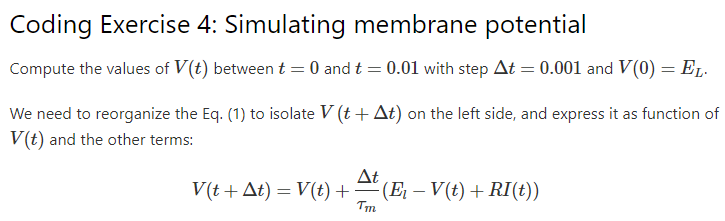

In [22]:
# Initialize step_end and v0
step_end= 10
v = el

# Loop for step_end steps
for step in range(step_end):
    # Compute valueof t
    t= step*dt
    
    # compute value of i at this time step
    i = i_mean*(1+np.sin((2*np.pi*t)/0.01))
    
    # compute v
    v = v+dt*(el-v+r*i)/tau
    
    # print value of t and v
    print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


# Section 3 : Plotting
### Plotting current

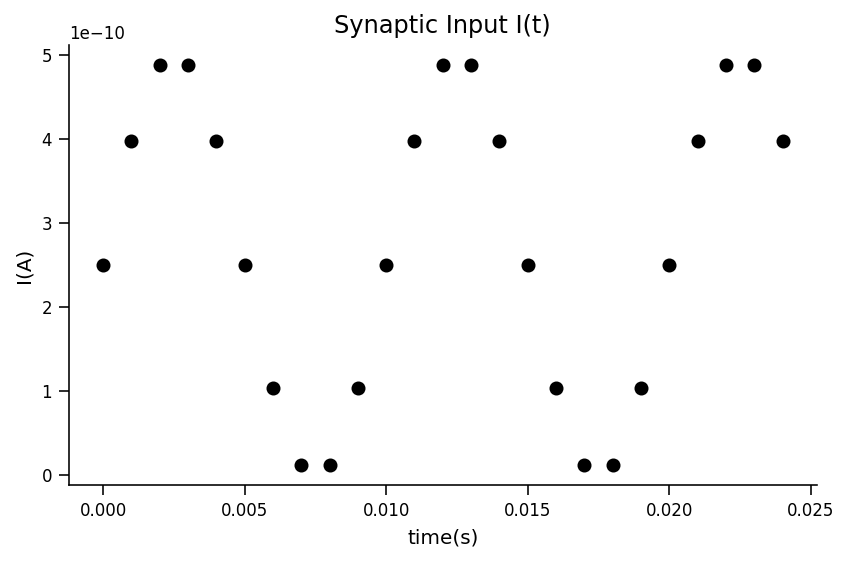

In [34]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input I(t)")
plt.xlabel("time(s)")
plt.ylabel("I(A)")

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t,i,'ko')

# Display the plot
plt.show()

### Plotting membrane potential

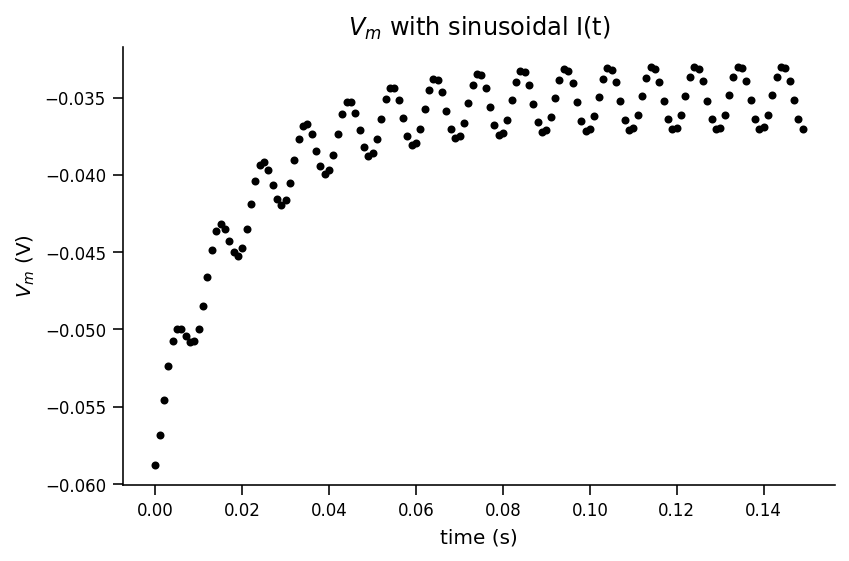

In [54]:
# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v+dt*(el-v+r*i)/tau

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t,v,'k.')

# Display plot
plt.show()

# Section 4 : Random synaptic input
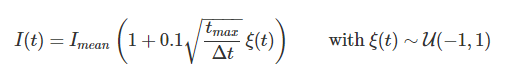
### Adding randomness

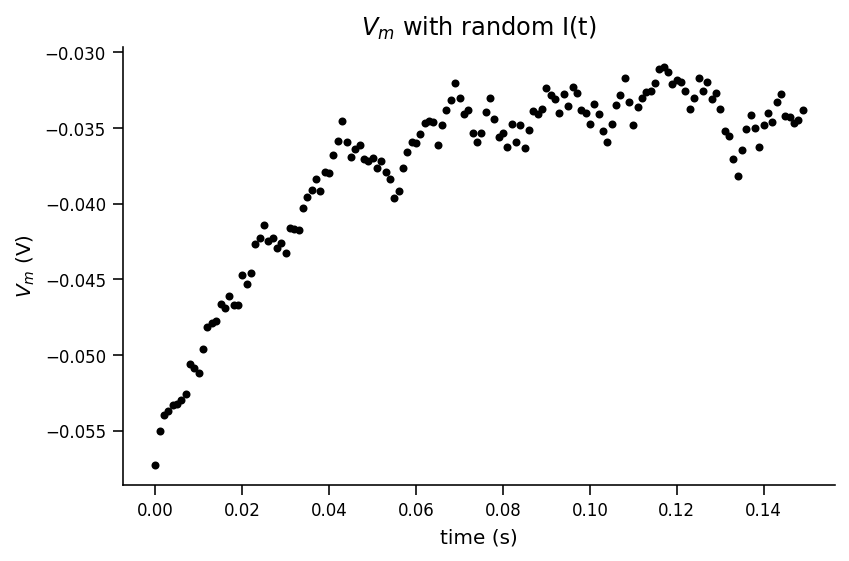

In [57]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2*np.random.random()-1 # np.random.ranoda() generate 0~1 random number. so double and minus 1

  # Compute value of i at this time step
  i = i_mean*(1+0.1*(t_max/dt)**0.5*random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

# Section 5 : Lists & ensemble statistics
#### Sample mean
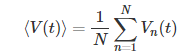
#### Sample variance
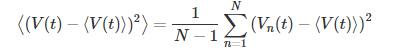
#### Sample autocovariance
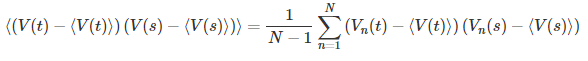

### Storing simulations in lists

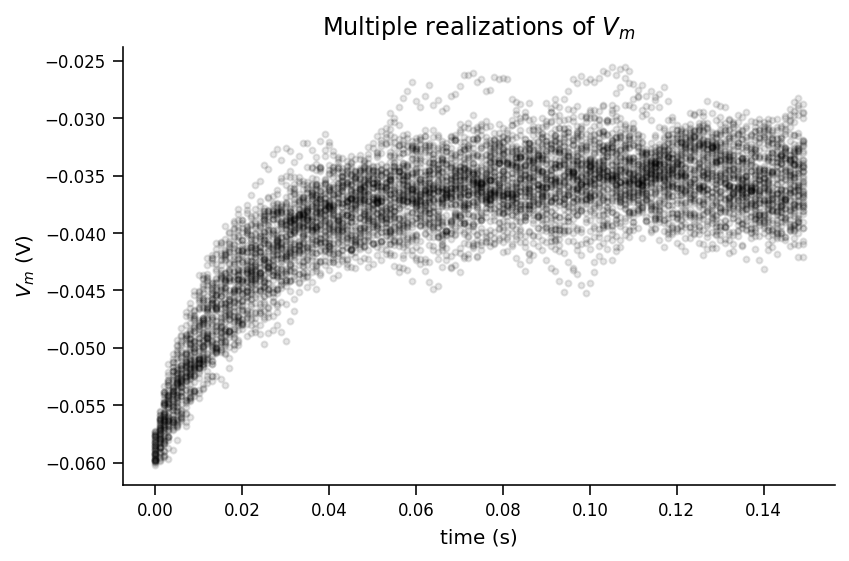

In [65]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el]*n

  # Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
for step in range(step_end):
    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j]+dt/tau*(el-v_n[j]+r*i)


    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t]*n,v_n,'k.',alpha=0.1)

  # Display plot
plt.show()

### Plotting sample mean

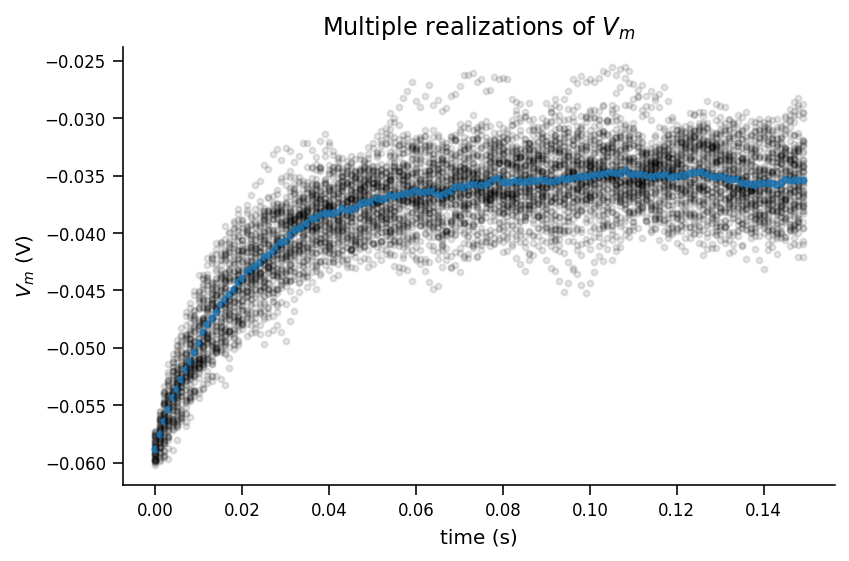

In [66]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean by summing list of v_n using sum, and dividing by n
  v_mean = sum(v_n)/n

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t,v_mean,'C0.',alpha=0.8)

# Display plot
plt.show()

### Plotting sample standard deviation
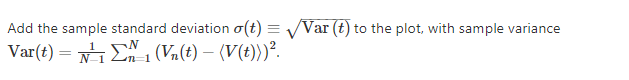


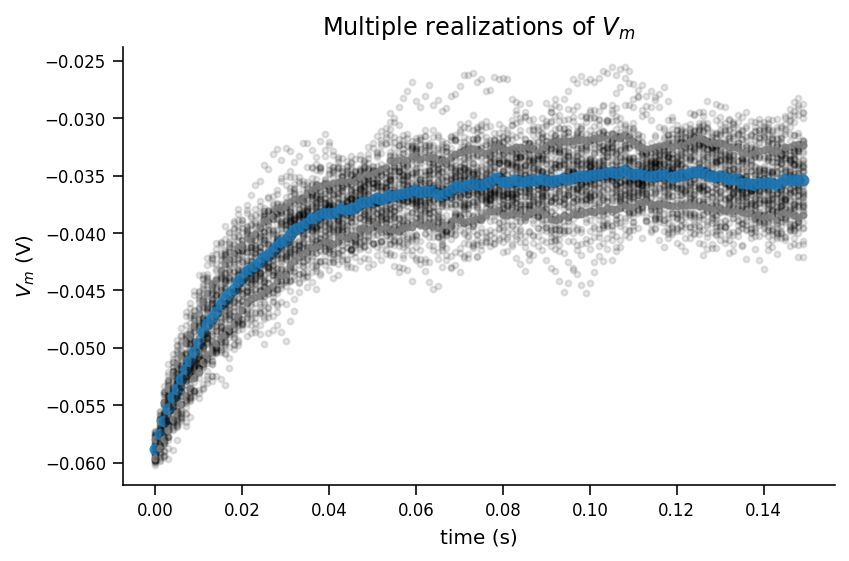

In [70]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
    t = step * dt

  # Loop for n simulations
    for j in range(0, n):

    # Compute value of i at this time step
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
    
  # Compute sample mean
    v_mean = sum(v_n) / n

  # Initialize a list `v_var_n` with the contribution of each V_n(t) to
  # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v-v_mean)**2 for v in v_n]

  # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n)/(n-1)

  # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

  # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

  # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t,v_mean+v_std,'C7.',alpha=0.8)

  # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t,v_mean-v_std,'C7.',alpha=0.8)


# Display plot
plt.show()

# Section 6 : Using NumPy

### Rewriting with numpy

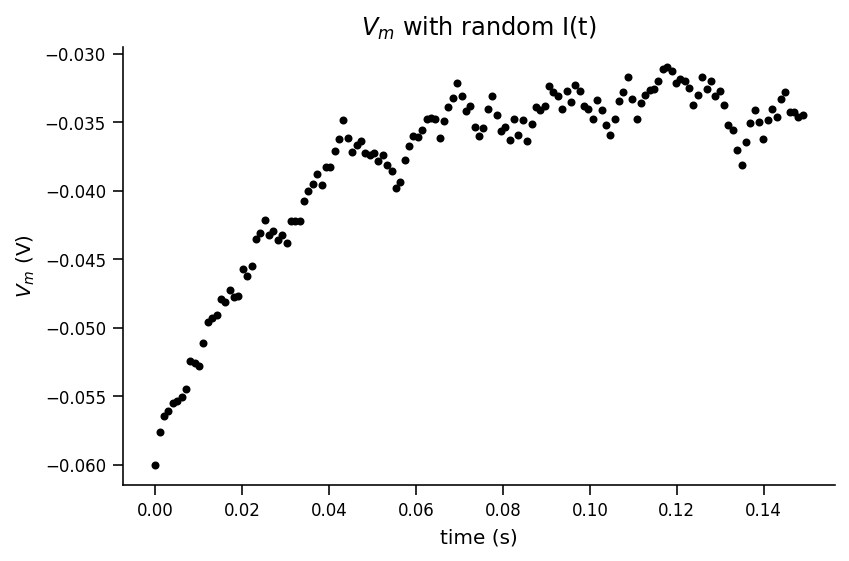

In [71]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step-1]+ (dt / tau) * (el - v[step-1] + r*i[step])


# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

### Using enumerate & indexing

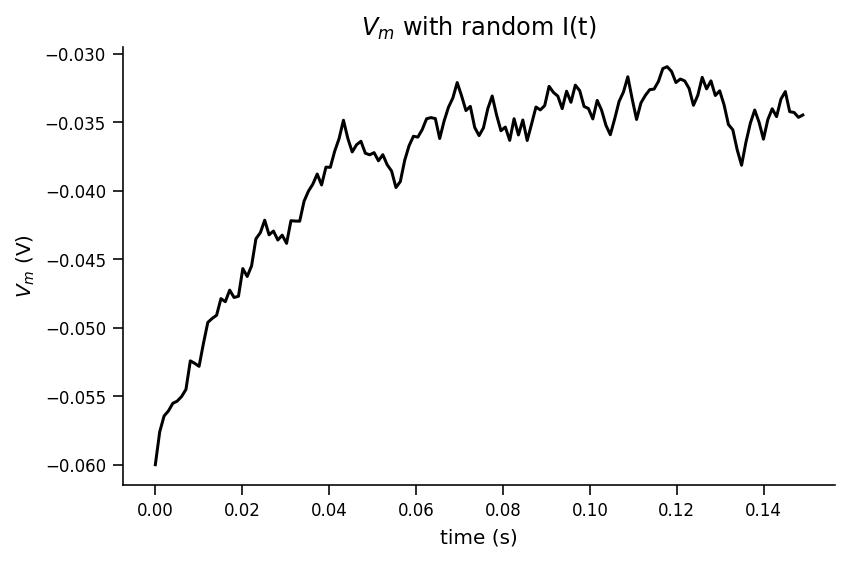

In [72]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step-1]+ (dt / tau) * (el - v[step-1] + r*i_step)

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

# Section 7 : Aggregation

### Using 2d arrays

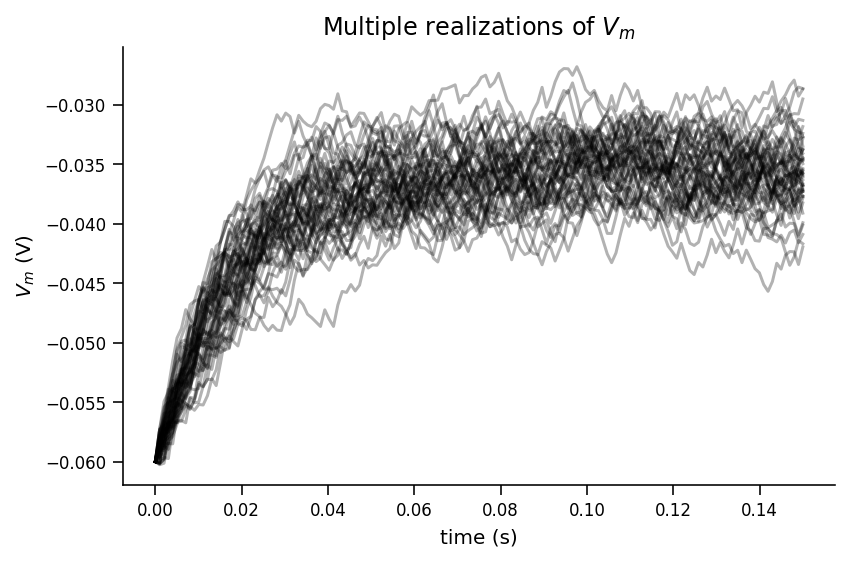

In [82]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random([n,step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:,step-1] + (dt / tau) * (el - v_n[:,step-1] + r*i[:,step])

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range,v_n.T,'k',alpha=0.3)
plt.show()

### Plotting sample mean and standard deviation

np.mean(v_n,axis=0)  over rows  -> mean for each neuron


np.mean(v_n,axis=1)  over columns  -> mean for each time step

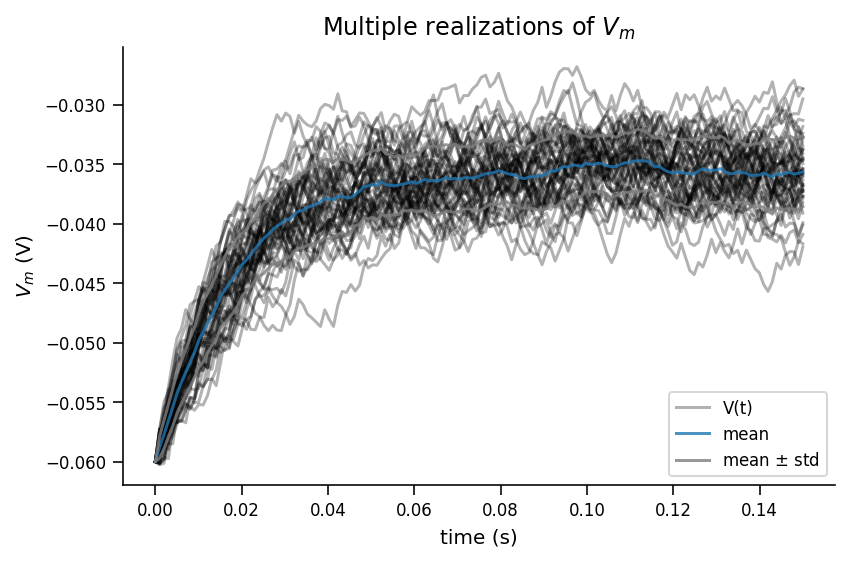

In [85]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Compute sample mean (use np.mean)
v_mean = np.mean(v_n,axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n,axis=0)

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.3)

plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

plt.legend()
plt.show()